In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
T=0.1
r=0.8
a=0.2
b=1
c=0.1
u=1
X=[]
x=0
U=[]
Xs=np.linspace(0, 1, 101)
Xs=Xs[:-1]
Us=np.zeros([100, 100])
λ=100
γ=0.98

In [3]:
for i in range(100):
    x=Xs[i]
    for j in range(100):
        xn=Xs[j]
        
        dxdt=(xn-x)/T
        Us[i, j]=(dxdt+a*x+c)/b

In [4]:
P=np.zeros([100, 100])   #Passive dynamics

for i in range(100):
    s=0
    for j in range(100):
        u=Us[i, j]
        
        if abs(u)<=1:
            p=1-u**2
            s+=p
            P[i, j]=p
            
    P[i, :]=P[i, :]/s

P -> Passive dynamics

In [5]:
V=np.zeros(100)
for i in range(100):
    
    if V[i]==r:
        V[i]=-10

In [6]:
class DCmotor(object):
    
    def __init__(self, Xs, P, V):
        
        self.Xs=Xs
        self.P=P
        self.U=np.zeros([100, 100])
        self.V=V
        self.Z=np.exp(-V)
        self.r=0.5
        self.Esum=0
        self.xindex=0
        
        
    def updateU(self):
        
        for i in range(100):
            
            s=0
            for j in range(100):
                
                z=self.Z[j]
                p=self.P[i, j]
                
                self.U[i, j]=p*z
                s+=p*z
               
            
            if s==0:
                self.U[i, :]=self.P[i, :]
            else:
                self.U[i, :]=self.U[i, :]/s
            
    def updateV(self):
        
        V=np.zeros(100)
        for i in range(100):
            
            s=λ*(self.Xs[i]-self.r)**(2)+0.1*T*self.Esum
            
            for j in range(100):
                   
                s+=γ*self.U[i, j]*self.V[j]
                
                
            V[i]=s
            
        self.V=V
        self.Z=np.exp(-V)
        
    def step(self):
        
        
        self.Esum+=abs(self.r-self.Xs[self.xindex])**2
        
       
        self.updateU()
        self.updateV()
        
        u=self.U[self.xindex, :]
        self.xindex=np.argmax(u)
        
        if abs(self.r-self.Xs[self.xindex])==0:
            self.Esum=0

        return self.Xs[self.xindex], self.V[self.xindex]

In [7]:
A=DCmotor(Xs, P, V)

In [8]:
X=[]
Vc=[]
Xr=[]

A.r=0.8


for i in range(70):
    x, v=A.step()
    X.append(x)
    Vc.append(v)
    Xr.append(A.r)

    
A.r=0.3


for i in range(70):
    x, v=A.step()
    X.append(x)
    Vc.append(v)
    Xr.append(A.r)

    
A.r=0.7


for i in range(70):
    x, v=A.step()
    X.append(x)
    Vc.append(v)
    Xr.append(A.r)

    
A.r=0.1


for i in range(70):
    x, v=A.step()
    X.append(x)
    Vc.append(v)
    Xr.append(A.r)
    
    
A.r=0.5


for i in range(70):
    x, v=A.step()
    X.append(x)
    Vc.append(v)
    Xr.append(A.r)

    
A.r=0.2


for i in range(70):
    x, v=A.step()
    X.append(x)
    Vc.append(v)
    Xr.append(A.r)

    
A.r=0.75


for i in range(70):
    x, v=A.step()
    X.append(x)
    Vc.append(v)
    Xr.append(A.r)

Ts=np.linspace(0,49, 490)

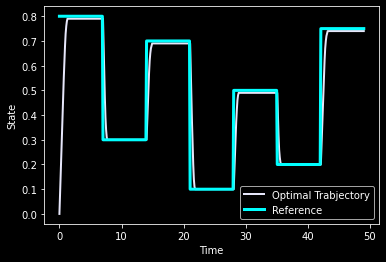

In [9]:
plt.plot(Ts, X, color='lavender', linewidth=2)
plt.plot(Ts, Xr, color='aqua', linewidth=3)
plt.xlabel('Time')
plt.ylabel('State')
plt.grid(False)
plt.legend(['Optimal Trabjectory', 'Reference'], loc=4)
plt.savefig('λ100_MotorRefTrack.png', transparent=True, dpi=600)
plt.show()

just explore this idea a bit, that do I need to consider updating V for every state, or I can just do with current state itself

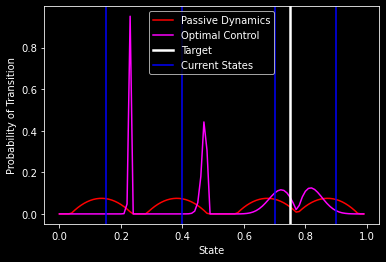

In [10]:
P=A.P[15]+A.P[40]+A.P[70]+A.P[90]
U=A.U[15]+A.U[40]+A.U[70]+A.U[90]

plt.style.use('dark_background')
plt.plot(Xs, P, color='Red')
plt.plot(Xs, U, color='magenta')
plt.axvline(x=0.75, ymin=0, ymax=3, color='White', linewidth=2.5, markersize=12)
plt.axvline(x=0.15, ymin=0, ymax=3, color='blue', linewidth=1.5, markersize=12)
plt.axvline(x=0.40, ymin=0, ymax=3, color='blue', linewidth=1.5, markersize=12)
plt.axvline(x=0.70, ymin=0, ymax=3, color='blue', linewidth=1.5, markersize=12)
plt.axvline(x=0.90, ymin=0, ymax=3, color='blue', linewidth=1.5, markersize=12)
plt.xlabel('State')
plt.legend(['Passive Dynamics', 'Optimal Control', 'Target', 'Current States'])
plt.ylabel('Probability of Transition')
plt.grid(False)
plt.savefig('λ100_MotorControl_Dynamics.png', transparent=True, dpi=600)
plt.show()